In [1]:
#Librerias 
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy import interpolate
from scipy import optimize

### 1) Elaborar una gráfica de la densidad como función de la altura.

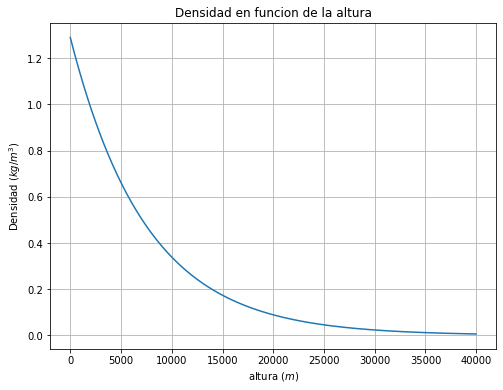

In [2]:
#Parametros 
λ = 7482.2                                   #Constante
P0 = 1.29                                    #Densidad del aire a nivel del mar
y = np.arange(0,40000,10)                    #Vakores de la altura
P = P0*np.exp(-y/λ)                          #Calculo de la densidad

#Grafica
plt.figure(figsize=(8,6))
plt.title('Densidad en funcion de la altura')
plt.plot(y,P)
plt.xlabel('altura $(m)$')
plt.ylabel('Densidad $(kg/m^3)$')
plt.grid()

### 2) Diseñar un programa que resuelva la ecuación diferencial que describe el movimiento del paracaidista, para los siguientes parámetros:


*   $m=60kg$, $A=0.3m^2$, $h=30km$.
*   $m=60kg$, $A=0.3m^2$, $h=40km$.
*   $m=60kg$, $A=0.3m^2$, $h=50km$.
*   $m=60kg$, $A=0.3m^2$, $h=60km$.
*   $m=60kg$, $A=0.3m^2$, $h=70km$.



In [3]:
#Parametros
m = 60
A = 0.3
h = [30000,40000,50000,60000,70000]
k0 = P0*A*0.8/(2*m)

#Funcion 
def func(x,t):
  dx = x[1]   
  dv = -9.8+k0*x[1]**2*np.exp(-x[0]/λ) 
  return [dx,dv]

x = np.zeros((5,200))
v = np.zeros((5,200))
t = np.linspace(0,300,200)
i = 0
for i in range(5):
  x0=np.array([h[i],0])
  x[i]=odeint(func, x0 , t)[:,0]
  v[i]=odeint(func, x0 , t)[:,1]


### 3) Con la solucion de la ecuacion diferencial, elaborar una gráfica de.

*   la posición como función del tiempo.
*   La velocidad como función del tiempo.
*   La velocidad como función de la posición

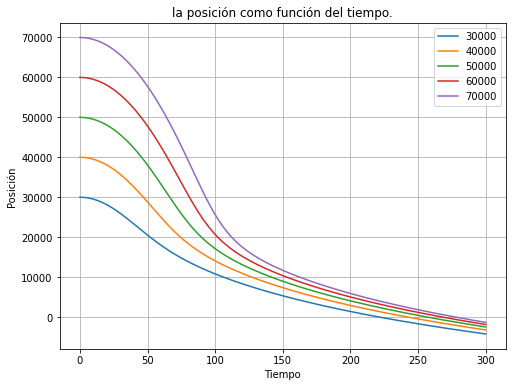

In [4]:
# la posición como función del tiempo.
plt.figure(figsize=(8,6))
plt.title("la posición como función del tiempo.")
plt.xlabel("Tiempo")
plt.ylabel("Posición")
for i in range(5):
  plt.plot(t,x[i],label=h[i])
plt.legend()
plt.grid()
plt.show()

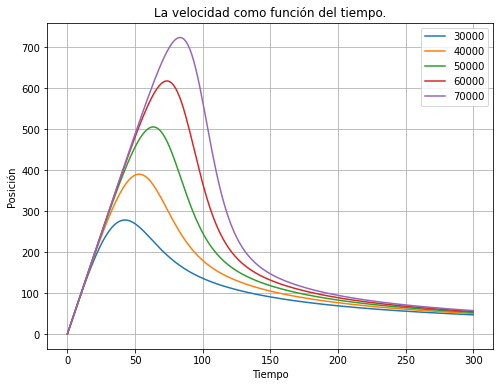

In [5]:
# La velocidad como función del tiempo.
plt.figure(figsize=(8,6))
plt.title("La velocidad como función del tiempo.")
plt.xlabel("Tiempo")
plt.ylabel("Posición")
for i in range(5):
  plt.plot(t,-v[i],label=h[i])
plt.legend()
plt.grid()
plt.show()

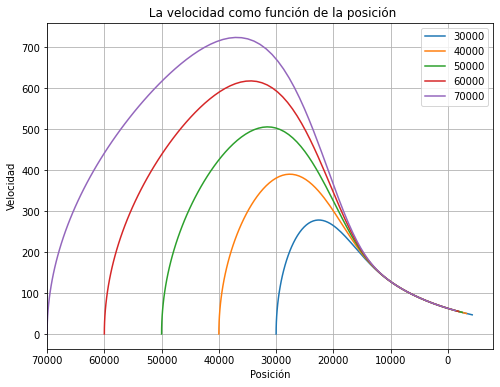

In [6]:
# La velocidad como función de la posición
plt.figure(figsize=(8,6))
plt.title(" La velocidad como función de la posición")
plt.xlabel("Posición")
plt.ylabel("Velocidad")
for i in range(5):
  plt.plot(x[i],-v[i],label=h[i])
plt.xlim(70000, plt.xlim()[0])
plt.legend()
plt.grid()
plt.show()

### 4) Determine numéricamente y analiticamente el valor de la velocidad maxima para las diferentes altura Compara su resultado con:

Optimization terminated successfully.
         Current function value: -278.163995
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -278.163995
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -390.008100
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -390.008100
         Iterations: 2
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: -505.472423
         Iterations: 2
         Function evaluations: 35
Optimization terminated successfully.
         Current function value: -505.472423
         Iterations: 2
         Function evaluations: 35
Optimization terminated successfully.
         Current function value: -617.714128
         Iterations: 2
         Function evaluations: 38
Optimization termina

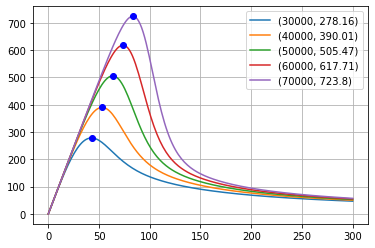

In [7]:
#Calculo del maximo
max=np.zeros((5,2))
for i in range(5):
  P=interpolate.CubicSpline(t,v[i])
  max[i,0]=optimize.fmin_powell(P,0,full_output=True)[0]
  max[i,1]=-optimize.fmin_powell(P,0,full_output=True)[1]

#Grafico
for i in range(5):
  plt.plot(t,-v[i],label=(h[i],np.round(max[i,1],2)))
plt.plot(max[:,0],max[:,1],'bo',)
plt.legend()
plt.grid()
plt.show()

### 5) Realice un grafico de la velocidad maxima como función de la altura de caida.

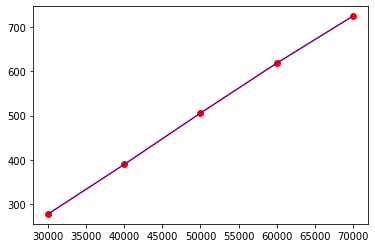

In [8]:
plt.figure()
plt.plot(h,max[:,1],'ro')
plt.plot(h,max[:,1],color="purple")
plt.show()